In [1]:
import jupyterthemes as jt

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [8]:
os.chdir = ("E:\\FORE\\Term 3\\MLP")
bm = pd.read_csv("E:\\FORE\\Term 3\\MLP\\Assignment\\bank_cleaned.csv")

In [9]:
bm.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [10]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [16]:
del bm["Unnamed: 0"]

In [17]:
bm.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [19]:
C = ["job", "marital", "education", "default", "housing", "loan", "month", "campaign", "poutcome"]

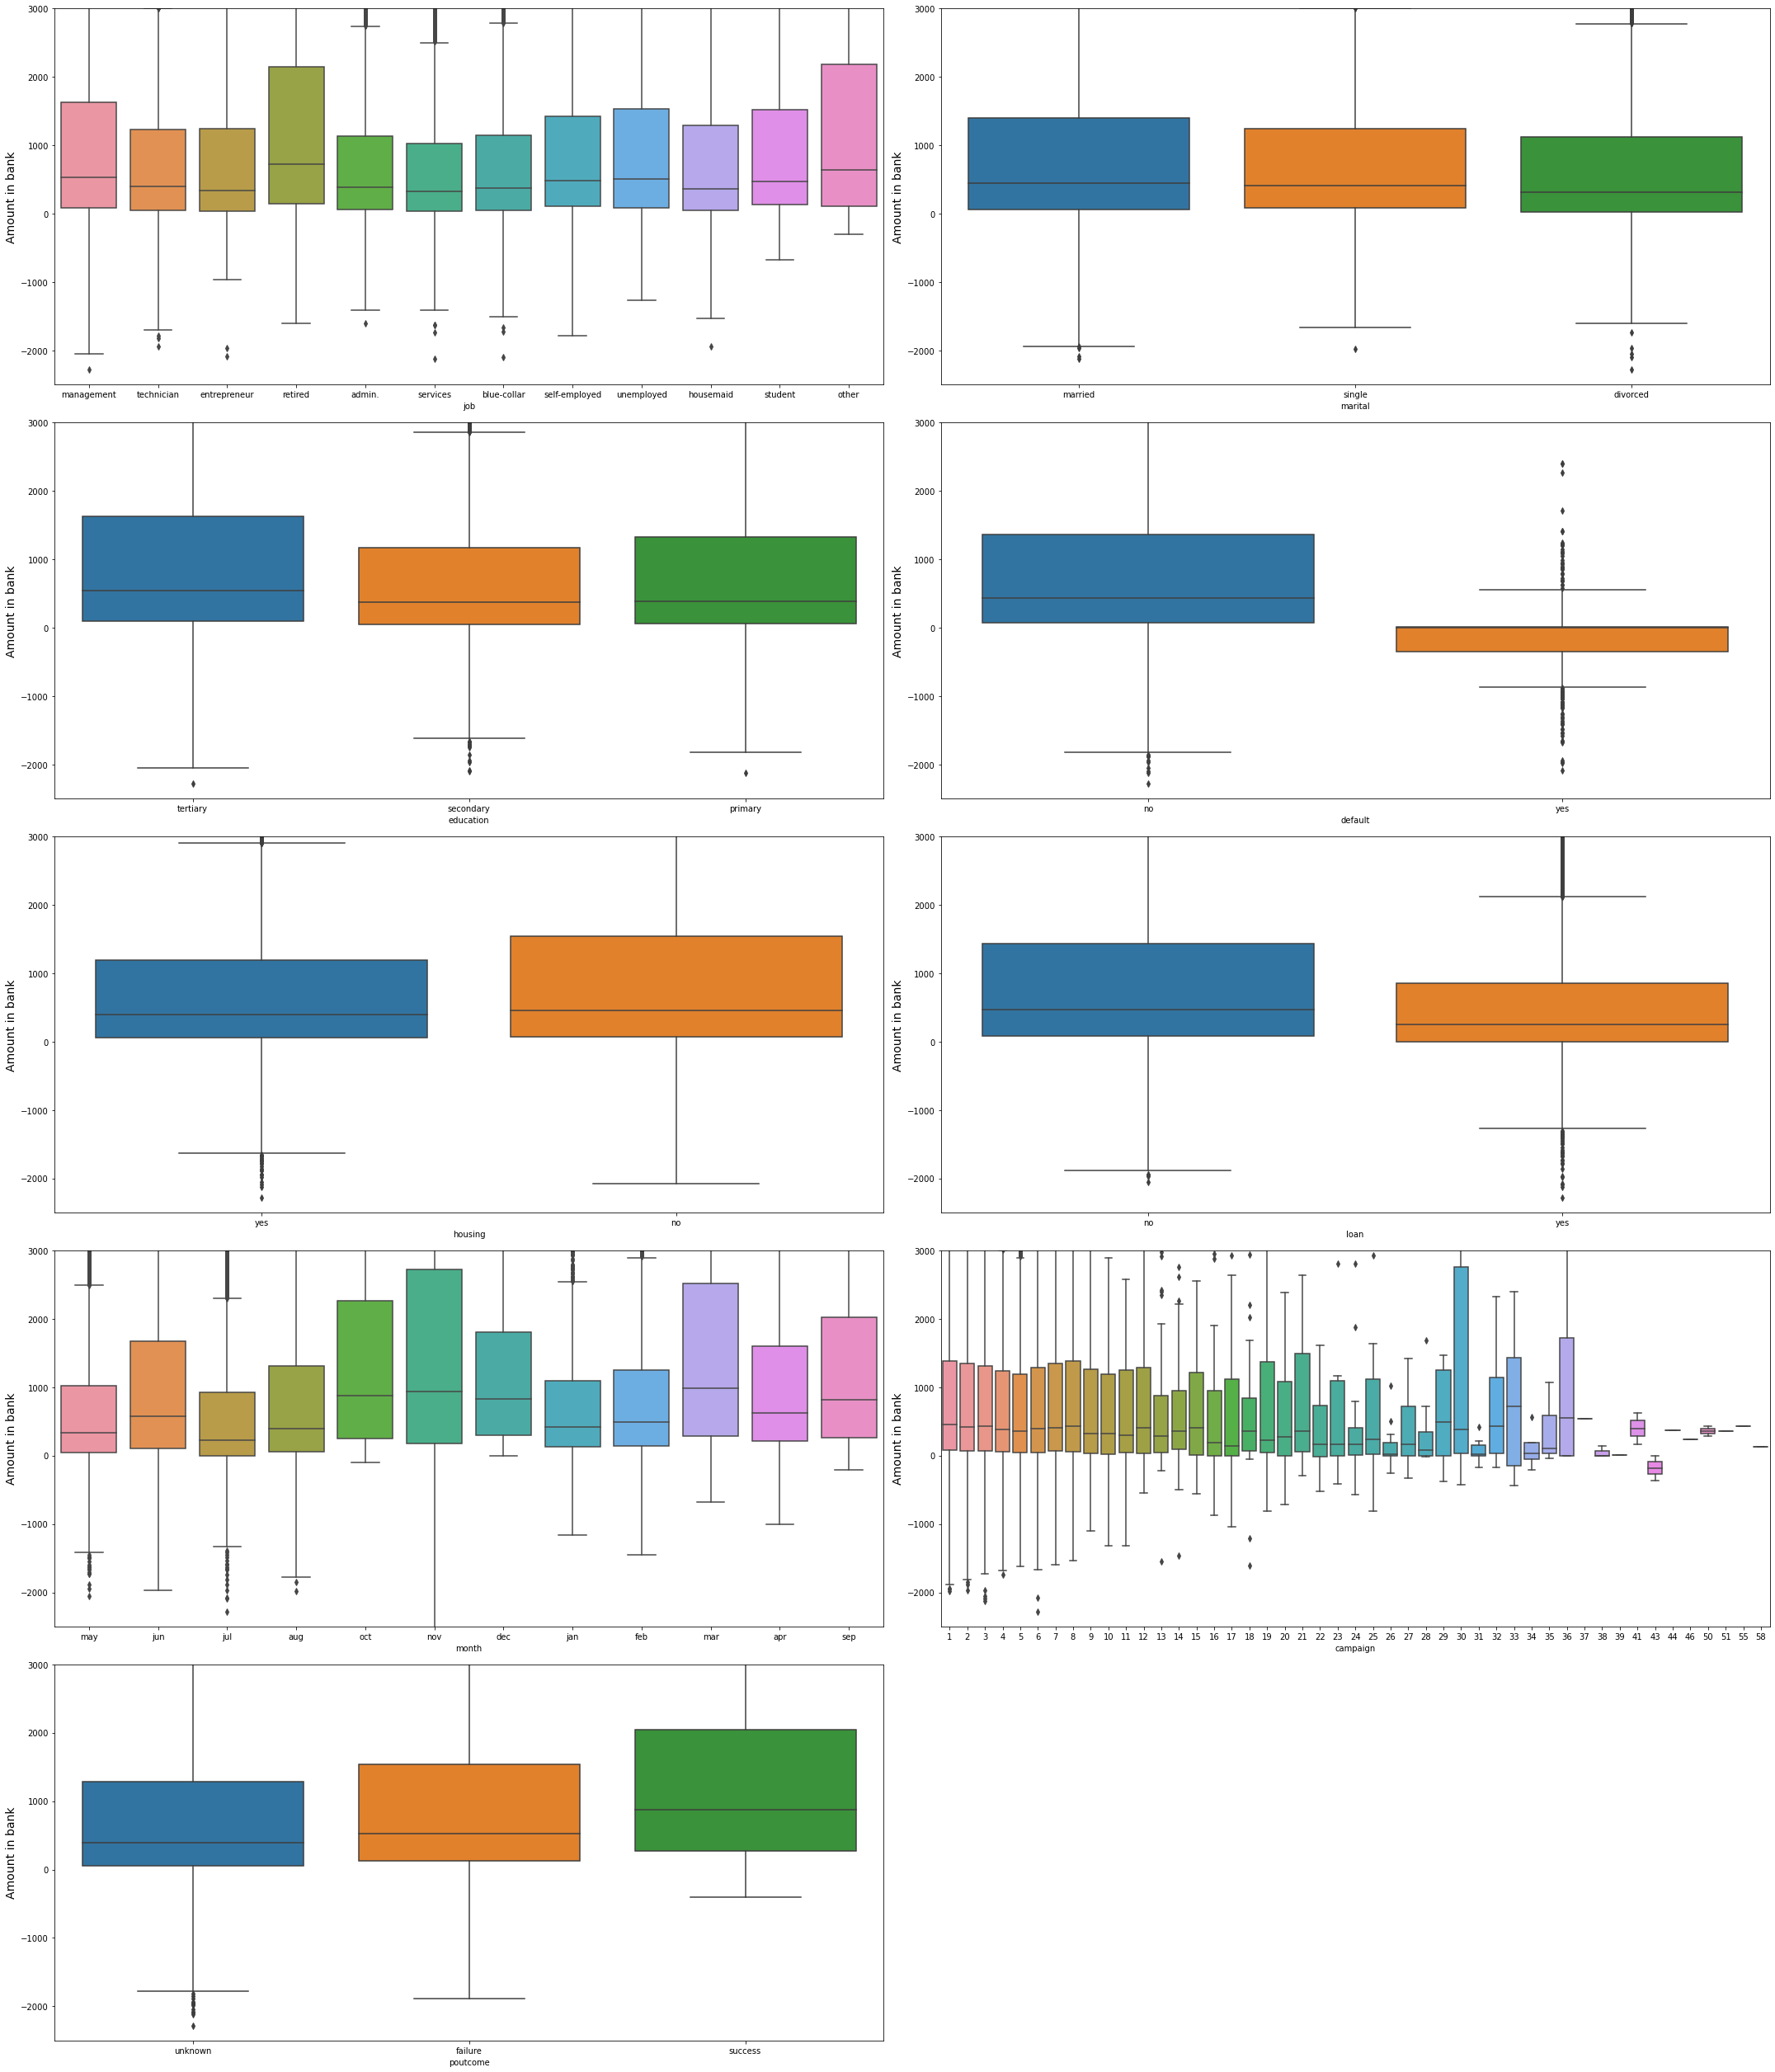

In [27]:
plt.figure(figsize=(30,35))
x=1
for i in C:
    plt.subplot(5,2,x, ylim = (-2500,3000))
    sns.boxplot(data=bm,y='balance',x=i)
    plt.ylabel('Amount in bank',fontsize=14)
    plt.xlabel(i,fontsize=10)
    plt.tight_layout()
    x=x+1
plt.show()

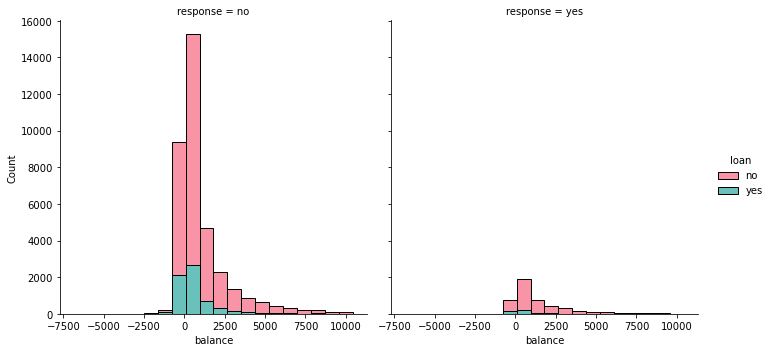

In [55]:


_=sns.displot(x = bm["balance"],col=  bm["response"],hue = "loan", multiple = "stack",data = bm, palette = "husl", bins = 20)

In [56]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              40841 non-null  int64  
 1   job              40841 non-null  object 
 2   marital          40841 non-null  object 
 3   education        40841 non-null  object 
 4   default          40841 non-null  object 
 5   balance          40841 non-null  int64  
 6   housing          40841 non-null  object 
 7   loan             40841 non-null  object 
 8   day              40841 non-null  int64  
 9   month            40841 non-null  object 
 10  duration         40841 non-null  float64
 11  campaign         40841 non-null  int64  
 12  pdays            40841 non-null  int64  
 13  previous         40841 non-null  int64  
 14  poutcome         40841 non-null  object 
 15  response         40841 non-null  object 
 16  response_binary  40841 non-null  int64  
dtypes: float64(1

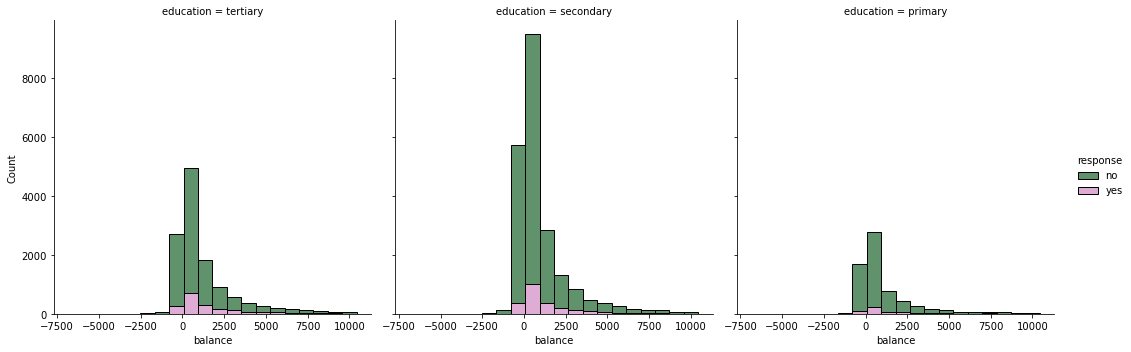

In [58]:


_=sns.displot(x = bm["balance"],col=  bm["education"],hue = "response", multiple = "stack",data = bm,
              palette = "cubehelix", bins = 20)

<AxesSubplot:xlabel='response', ylabel='balance'>

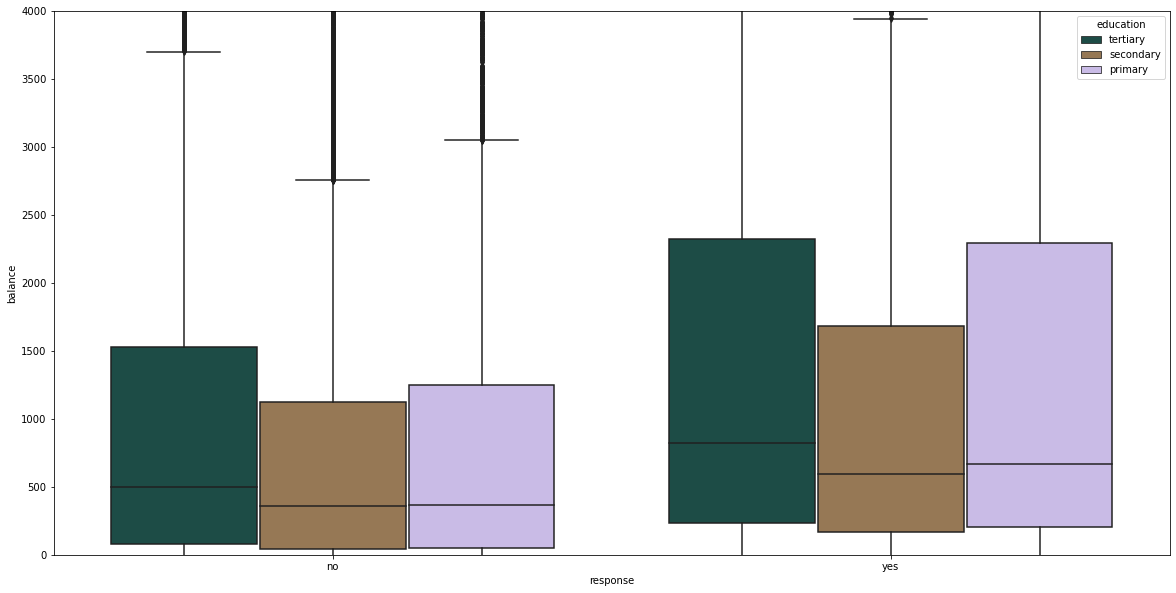

In [91]:
plt.figure(figsize = (20,10))
plt.ylim(0, 4000)
sns.boxplot(x="response", y= "balance" ,hue="education",data=bm, palette = "cubehelix" )


<AxesSubplot:xlabel='response', ylabel='balance'>

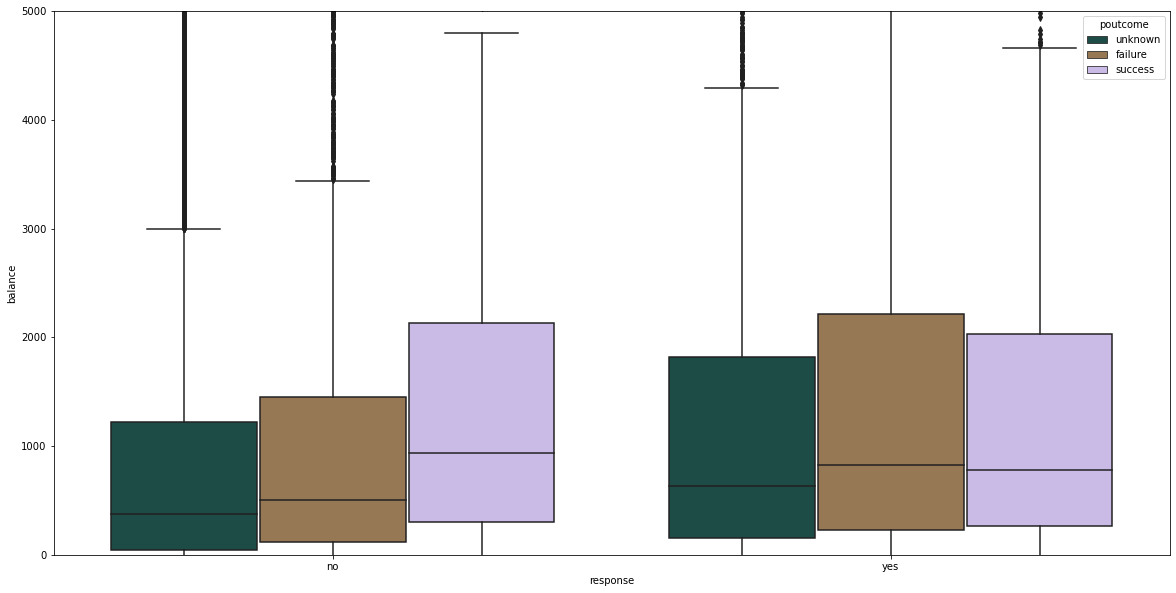

In [92]:
plt.figure(figsize = (20,10))
plt.ylim(0, 5000)
sns.boxplot(x="response", y= "balance" ,hue="poutcome",data=bm, palette = "cubehelix" )


In [95]:
bm2 = bm.groupby(["poutcome","month"])["response_binary"].count().reset_index()

In [97]:
bm3 = bm2.pivot_table(index = 'month', columns = 'poutcome', values = 'response_binary')

In [99]:
bm3

poutcome,failure,success,unknown
month,,,
apr,694,123,1712
aug,215,193,5469
dec,38,49,86
feb,502,129,1627
jan,275,57,851
jul,100,86,6334
jun,129,113,4611
mar,69,55,283
may,1623,222,10651


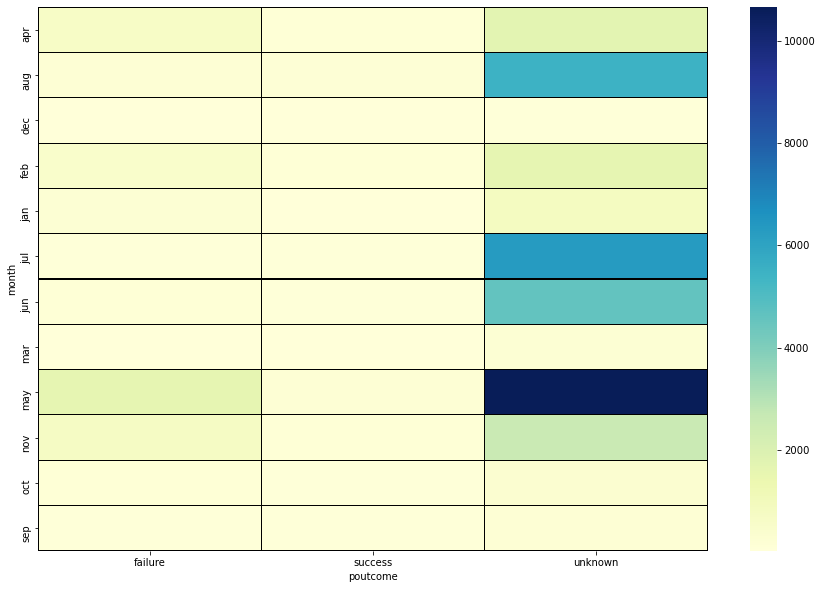

In [103]:
plt.figure(figsize = (15,10))
_=sns.heatmap(bm3, cmap="YlGnBu",linewidth = "0.005",linecolor ="black")

In [104]:
bm.isna().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [105]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              40841 non-null  int64  
 1   job              40841 non-null  object 
 2   marital          40841 non-null  object 
 3   education        40841 non-null  object 
 4   default          40841 non-null  object 
 5   balance          40841 non-null  int64  
 6   housing          40841 non-null  object 
 7   loan             40841 non-null  object 
 8   day              40841 non-null  int64  
 9   month            40841 non-null  object 
 10  duration         40841 non-null  float64
 11  campaign         40841 non-null  int64  
 12  pdays            40841 non-null  int64  
 13  previous         40841 non-null  int64  
 14  poutcome         40841 non-null  object 
 15  response         40841 non-null  object 
 16  response_binary  40841 non-null  int64  
dtypes: float64(1

In [106]:
bmw = bm.drop_duplicates(subset = None, keep ='first')

In [107]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40841 entries, 0 to 40840
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              40841 non-null  int64  
 1   job              40841 non-null  object 
 2   marital          40841 non-null  object 
 3   education        40841 non-null  object 
 4   default          40841 non-null  object 
 5   balance          40841 non-null  int64  
 6   housing          40841 non-null  object 
 7   loan             40841 non-null  object 
 8   day              40841 non-null  int64  
 9   month            40841 non-null  object 
 10  duration         40841 non-null  float64
 11  campaign         40841 non-null  int64  
 12  pdays            40841 non-null  int64  
 13  previous         40841 non-null  int64  
 14  poutcome         40841 non-null  object 
 15  response         40841 non-null  object 
 16  response_binary  40841 non-null  int64  
dtypes: float64(1

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

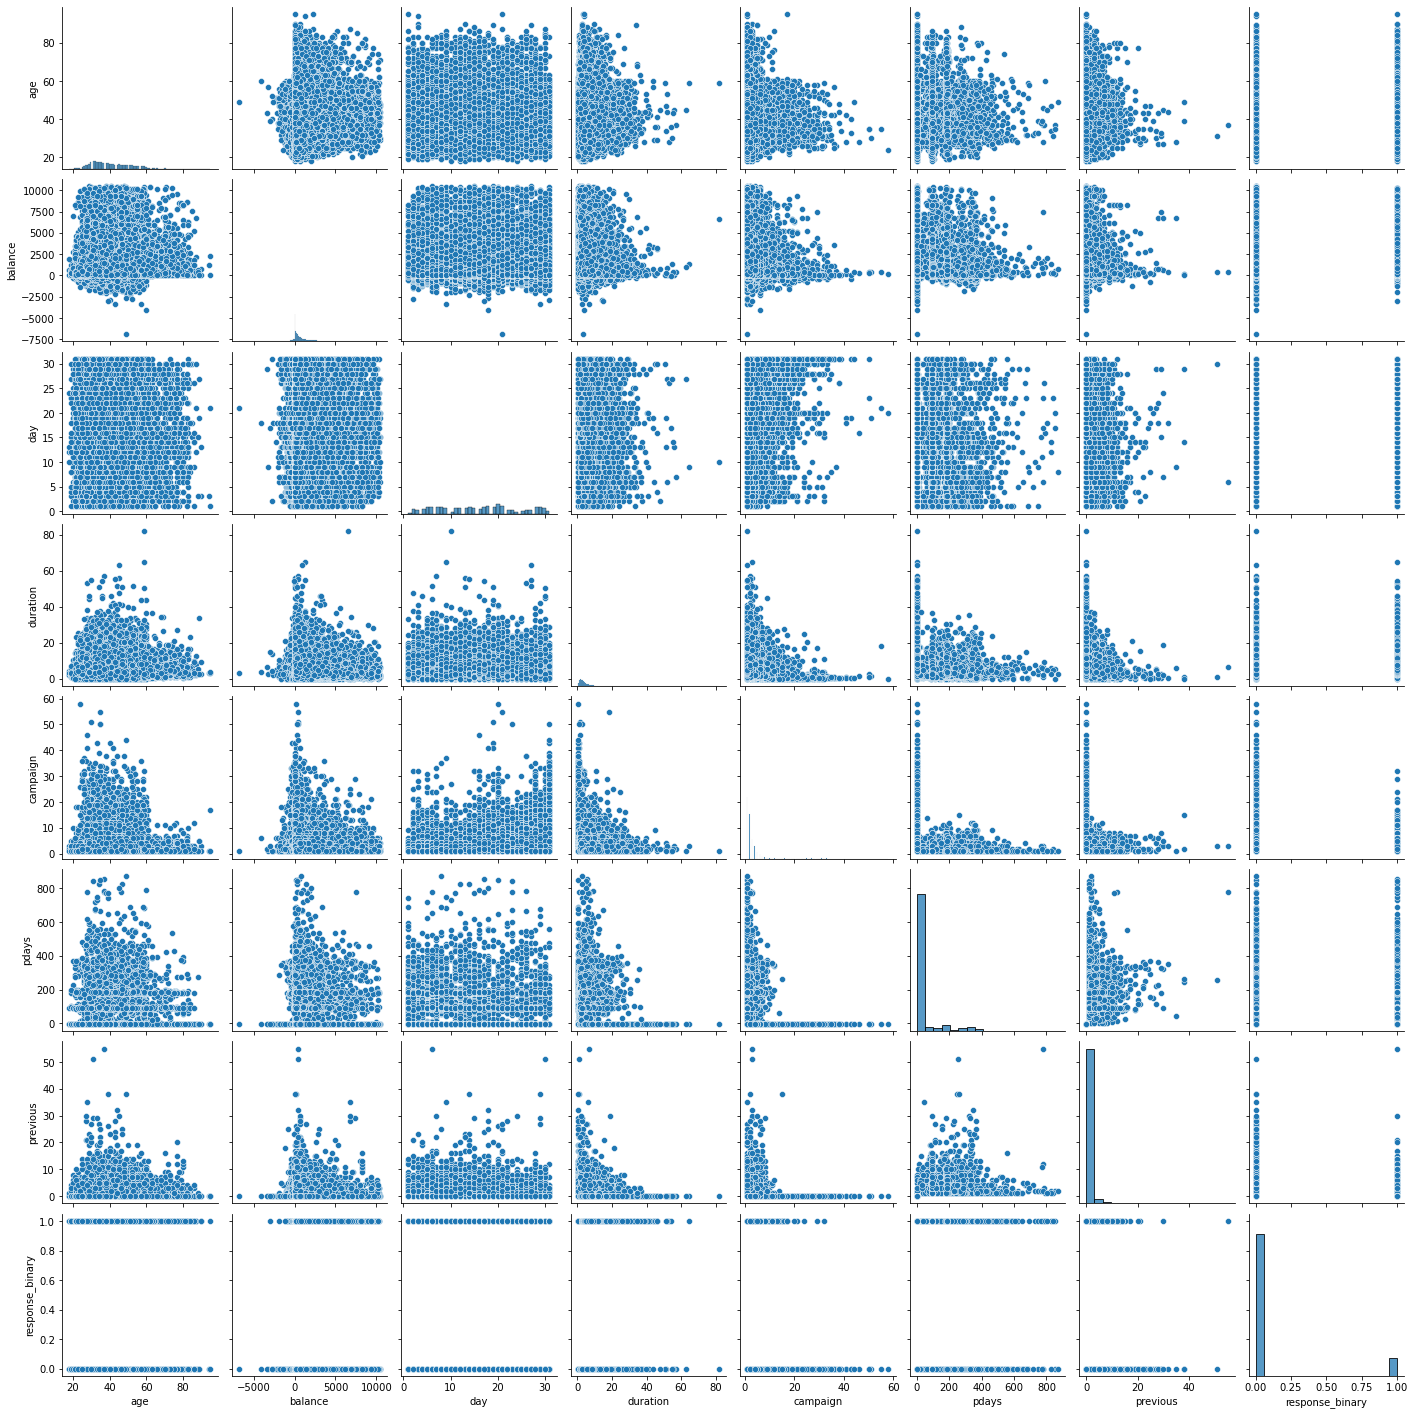

In [110]:
sns.pairplot(bm)

In [138]:
bm.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Days since last call
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,Called first time
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,Called first time
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,Called first time
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,Called first time
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,Called first time


In [139]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   40841 non-null  int64   
 1   job                   40841 non-null  object  
 2   marital               40841 non-null  object  
 3   education             40841 non-null  object  
 4   default               40841 non-null  object  
 5   balance               40841 non-null  int64   
 6   housing               40841 non-null  object  
 7   loan                  40841 non-null  object  
 8   day                   40841 non-null  int64   
 9   month                 40841 non-null  object  
 10  duration              40841 non-null  float64 
 11  campaign              40841 non-null  int64   
 12  pdays                 40841 non-null  int64   
 13  previous              40841 non-null  int64   
 14  poutcome              40841 non-null  object  
 15  re

In [140]:
bm4 = bm.loc[(bm['pdays'] == -1 )]

In [141]:
bm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34797 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   34797 non-null  int64   
 1   job                   34797 non-null  object  
 2   marital               34797 non-null  object  
 3   education             34797 non-null  object  
 4   default               34797 non-null  object  
 5   balance               34797 non-null  int64   
 6   housing               34797 non-null  object  
 7   loan                  34797 non-null  object  
 8   day                   34797 non-null  int64   
 9   month                 34797 non-null  object  
 10  duration              34797 non-null  float64 
 11  campaign              34797 non-null  int64   
 12  pdays                 34797 non-null  int64   
 13  previous              34797 non-null  int64   
 14  poutcome              34797 non-null  object  
 15  re

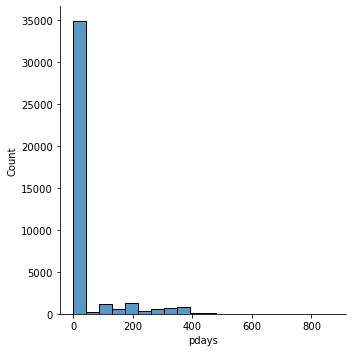

In [142]:

_=sns.displot(bm["pdays"], bins = 20)

In [143]:
bm["pdays"].max()

871

In [153]:
#assuming -1 means that client was not previously called as 999 has no rows
#creating a new column to identify number of times a person was contacted, and how many days passed
bins = [-2, 0, 15, 50, 100, 900]
names = ['Contacted first time', 'Contacted recently', 
         'Contacted 3-7 weeks back','Contacted long back' ,'Contacted very long back']
bm['Days since last contact'] = pd.cut(bm['pdays'], bins, labels=names)

In [155]:
del bm["Days since last call"]

In [156]:
bm.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Days since last contact
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,Contacted first time
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,Contacted first time
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,Contacted first time
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,Contacted first time
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,Contacted first time


In [146]:
bm.loc[(bm['pdays'] ==1  )]

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Days since last call
27745,41,blue-collar,married,primary,no,201,yes,no,4,feb,1.15,1,1,1,success,no,0,Called recently
28598,46,entrepreneur,married,secondary,no,122,no,no,6,feb,17.45,2,1,7,failure,no,0,Called recently
31777,45,blue-collar,married,secondary,no,640,yes,no,5,may,3.57,1,1,1,success,no,0,Called recently
40209,62,retired,married,secondary,no,569,no,no,4,aug,4.80,1,1,8,success,yes,1,Called recently
40210,29,management,married,tertiary,no,198,yes,no,4,aug,7.55,1,1,1,failure,no,0,Called recently
40211,68,retired,married,tertiary,no,2812,no,no,4,aug,10.85,1,1,7,success,yes,1,Called recently
40212,38,management,married,tertiary,no,1199,no,no,4,aug,2.97,1,1,1,success,yes,1,Called recently
40219,33,technician,married,secondary,no,1026,no,no,4,aug,1.45,1,1,5,failure,no,0,Called recently
40224,60,housemaid,married,secondary,no,0,no,no,4,aug,2.55,1,1,7,success,no,0,Called recently
40227,48,housemaid,single,primary,no,46,no,no,4,aug,1.97,1,1,3,success,yes,1,Called recently


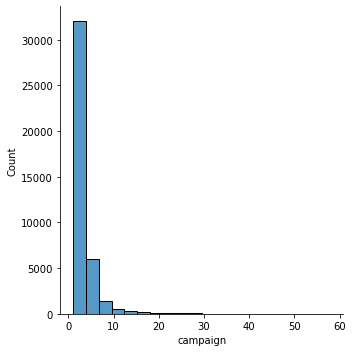

In [147]:

_=sns.displot(bm["campaign"], bins = 20)

In [152]:
print(bm["campaign"].max())

print(bm["campaign"].min())

58
1


In [169]:
#creating columns for number of times a client was contacted in this campaign
bins = [0, 1, 9, 30, 60]
names = ['First time contact', 'Contacted <10 times', 'Contacted 10-30 times','Contacted many times']
bm['Frequency of communication'] = pd.cut(bm['campaign'], bins, labels=names)

In [170]:
bm.loc[(bm['campaign'] ==1 )]

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Days since last contact,Frequency of communication
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,Contacted first time,First time contact
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,Contacted first time,First time contact
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,Contacted first time,First time contact
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,Contacted first time,First time contact
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,Contacted first time,First time contact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40829,36,management,single,secondary,no,1511,yes,no,16,nov,4.50,1,-1,0,unknown,yes,1,Contacted first time,First time contact
40832,53,management,married,tertiary,no,583,no,no,17,nov,3.77,1,184,4,success,yes,1,Contacted very long back,First time contact
40833,34,admin.,single,secondary,no,557,no,no,17,nov,3.73,1,-1,0,unknown,yes,1,Contacted first time,First time contact
40834,23,student,single,tertiary,no,113,no,no,17,nov,4.43,1,-1,0,unknown,yes,1,Contacted first time,First time contact


55
0


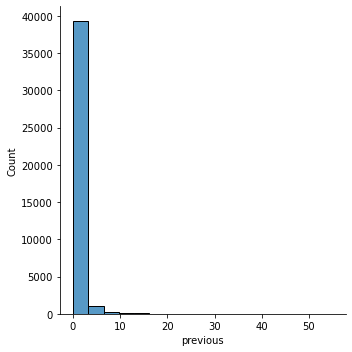

In [173]:
print(sns.displot(bm["previous"]))
print(bm["previous"].max())

print(bm["previous"].min())

In [176]:
#creating columns for number of times a client was contacted for a previous campaign
bins = [-1,0, 1, 9, 30, 60]
names = ['Never Contacted','First time contact', 'Contacted rarely', 'Contacted 10-30 times','Contacted many times']
bm['Contact in other campaigns'] = pd.cut(bm['previous'], bins, labels=names)

In [177]:
bm.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Days since last contact,Frequency of communication,Contact in other campaigns
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,Contacted first time,First time contact,Never Contacted
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,Contacted first time,First time contact,Never Contacted
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,Contacted first time,First time contact,Never Contacted
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,Contacted first time,First time contact,Never Contacted
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,Contacted first time,First time contact,Never Contacted


In [178]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   age                         40841 non-null  int64   
 1   job                         40841 non-null  object  
 2   marital                     40841 non-null  object  
 3   education                   40841 non-null  object  
 4   default                     40841 non-null  object  
 5   balance                     40841 non-null  int64   
 6   housing                     40841 non-null  object  
 7   loan                        40841 non-null  object  
 8   day                         40841 non-null  int64   
 9   month                       40841 non-null  object  
 10  duration                    40841 non-null  float64 
 11  campaign                    40841 non-null  int64   
 12  pdays                       40841 non-null  int64   
 13  previous        

In [179]:
C = ["job", "marital", "education", "default", "housing","loan", "poutcome","month",
     "Days since last contact","Frequency of communication","Contact in other campaigns"]

In [180]:
bm5 = pd.get_dummies(bm,columns=C)

In [181]:
bm5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 62 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   age                                               40841 non-null  int64  
 1   balance                                           40841 non-null  int64  
 2   day                                               40841 non-null  int64  
 3   duration                                          40841 non-null  float64
 4   campaign                                          40841 non-null  int64  
 5   pdays                                             40841 non-null  int64  
 6   previous                                          40841 non-null  int64  
 7   response                                          40841 non-null  object 
 8   response_binary                                   40841 non-null  int64  
 9   job_admin.       

In [192]:
bm5.head()

,age,balance,day,response,response_binary,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,Days since last contact_Contacted very long back,Frequency of communication_First time contact,Frequency of communication_Contacted <10 times,Frequency of communication_Contacted 10-30 times,Frequency of communication_Contacted many times,Contact in other campaigns_Never Contacted,Contact in other campaigns_First time contact,Contact in other campaigns_Contacted rarely,Contact in other campaigns_Contacted 10-30 times,Contact in other campaigns_Contacted many times
0,58,2143,5,no,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,44,29,5,no,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,33,2,5,no,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,35,231,5,no,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,28,447,5,no,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [199]:
 #dropping fields which will not be used

In [200]:
bm5

,age,balance,response,response_binary,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,...,Days since last contact_Contacted very long back,Frequency of communication_First time contact,Frequency of communication_Contacted <10 times,Frequency of communication_Contacted 10-30 times,Frequency of communication_Contacted many times,Contact in other campaigns_Never Contacted,Contact in other campaigns_First time contact,Contact in other campaigns_Contacted rarely,Contact in other campaigns_Contacted 10-30 times,Contact in other campaigns_Contacted many times
0,58,2143,no,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,44,29,no,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,33,2,no,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,35,231,no,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,28,447,no,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,505,yes,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
40837,51,825,yes,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
40838,71,1729,yes,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
40839,72,5715,yes,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [197]:
bm5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   age                                               40841 non-null  int64 
 1   balance                                           40841 non-null  int64 
 2   response                                          40841 non-null  object
 3   response_binary                                   40841 non-null  int64 
 4   job_admin.                                        40841 non-null  uint8 
 5   job_blue-collar                                   40841 non-null  uint8 
 6   job_entrepreneur                                  40841 non-null  uint8 
 7   job_housemaid                                     40841 non-null  uint8 
 8   job_management                                    40841 non-null  uint8 
 9   job_other                   

In [207]:
X = bm5

In [209]:
del X["response"]

In [210]:
del X["response_binary"]

In [211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   age                                               40841 non-null  int64
 1   balance                                           40841 non-null  int64
 2   job_admin.                                        40841 non-null  uint8
 3   job_blue-collar                                   40841 non-null  uint8
 4   job_entrepreneur                                  40841 non-null  uint8
 5   job_housemaid                                     40841 non-null  uint8
 6   job_management                                    40841 non-null  uint8
 7   job_other                                         40841 non-null  uint8
 8   job_retired                                       40841 non-null  uint8
 9   job_self-employed                      

In [218]:
bm5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   age                                               40841 non-null  int64
 1   balance                                           40841 non-null  int64
 2   job_admin.                                        40841 non-null  uint8
 3   job_blue-collar                                   40841 non-null  uint8
 4   job_entrepreneur                                  40841 non-null  uint8
 5   job_housemaid                                     40841 non-null  uint8
 6   job_management                                    40841 non-null  uint8
 7   job_other                                         40841 non-null  uint8
 8   job_retired                                       40841 non-null  uint8
 9   job_self-employed                      

In [219]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   age                         40841 non-null  int64   
 1   job                         40841 non-null  object  
 2   marital                     40841 non-null  object  
 3   education                   40841 non-null  object  
 4   default                     40841 non-null  object  
 5   balance                     40841 non-null  int64   
 6   housing                     40841 non-null  object  
 7   loan                        40841 non-null  object  
 8   day                         40841 non-null  int64   
 9   month                       40841 non-null  object  
 10  duration                    40841 non-null  float64 
 11  campaign                    40841 non-null  int64   
 12  pdays                       40841 non-null  int64   
 13  previous        

In [232]:
y = bm["response_binary"]

In [233]:
y = pd.DataFrame(y)


In [229]:
X

,age,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,...,Days since last contact_Contacted very long back,Frequency of communication_First time contact,Frequency of communication_Contacted <10 times,Frequency of communication_Contacted 10-30 times,Frequency of communication_Contacted many times,Contact in other campaigns_Never Contacted,Contact in other campaigns_First time contact,Contact in other campaigns_Contacted rarely,Contact in other campaigns_Contacted 10-30 times,Contact in other campaigns_Contacted many times
0,58,2143,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,44,29,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,33,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,35,231,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,28,447,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,505,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
40837,51,825,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
40838,71,1729,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
40839,72,5715,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0


In [234]:
y

,response_binary
0,0
1,0
2,0
3,0
4,0
...,...
40836,1
40837,1
40838,1
40839,1


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [236]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [237]:
y_pred = knn.predict(X_test)

In [238]:
confusion_matrix(y_test, y_pred)

array([[8881,  152],
       [1053,  125]], dtype=int64)

In [239]:
from sklearn.metrics import accuracy_score

In [240]:
accuracy_score(y_test, y_pred)

0.8819900107726961

In [241]:
from sklearn.metrics import precision_recall_fscore_support

In [242]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.8940004 , 0.45126354]),
 array([0.98317281, 0.10611205]),
 array([0.9364686 , 0.17182131]),
 array([9033, 1178], dtype=int64))

In [244]:
from sklearn.metrics import precision_score

In [245]:
precision_score(y_test, y_pred)

0.45126353790613716

In [246]:
from sklearn.metrics import recall_score

In [247]:
recall_score(y_test, y_pred)

0.10611205432937182

In [248]:
from sklearn.metrics import f1_score

In [249]:
f1_score(y_test, y_pred)

0.17182130584192437

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

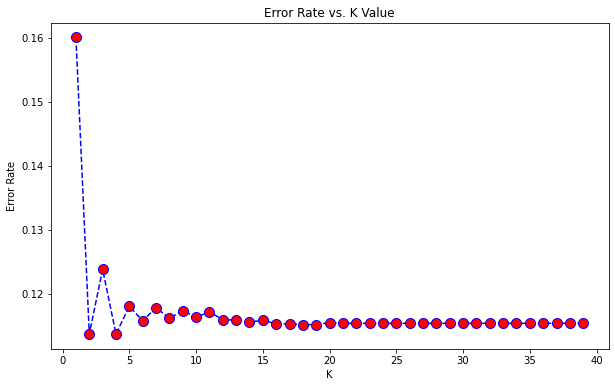

Minimum error:- 0.11370091078248945 at K = 2


In [250]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [252]:
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [253]:
y_pred = knn.predict(X_test)

In [254]:
accuracy_score(y_test, y_pred)

0.8862990892175105